In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Ali\Documents\python\facebook_ads_data.csv")
df

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [2]:
daily_stats = df.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stats

,total_spend,total_impressions,total_clicks,total_value
ad_date,,,,
2020-11-11,1.89,1800,45,2.38
2020-11-12,23.00,10473,397,21.13
2020-11-13,6.36,11669,451,9.77
2020-11-14,7.27,5005,392,12.67
2020-11-15,6.98,12465,657,10.96
...,...,...,...,...
2022-10-29,714.03,33358,115,680.34
2022-10-30,335.91,27562,69,472.61
2022-10-31,227.45,6054,58,191.87


In [3]:
daily_stats['romi'] = daily_stats['total_value'] / daily_stats['total_spend']
daily_stats = daily_stats.reset_index()
daily_stats

,ad_date,total_spend,total_impressions,total_clicks,total_value,romi
0,2020-11-11,1.89,1800,45,2.38,1.259259
1,2020-11-12,23.00,10473,397,21.13,0.918696
2,2020-11-13,6.36,11669,451,9.77,1.536164
3,2020-11-14,7.27,5005,392,12.67,1.742779
4,2020-11-15,6.98,12465,657,10.96,1.570201
...,...,...,...,...,...,...
542,2022-10-29,714.03,33358,115,680.34,0.952817
543,2022-10-30,335.91,27562,69,472.61,1.406954
544,2022-10-31,227.45,6054,58,191.87,0.843570
545,2022-11-01,0.00,0,0,0.00,NaN


In [4]:
daily_stats_2021 = daily_stats[(daily_stats['ad_date'] >= '2021-01-01') & (daily_stats['ad_date'] <= '2021-12-31')]

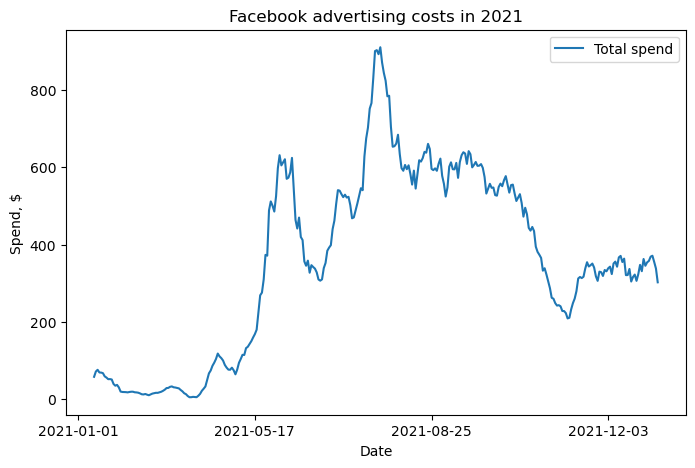

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=100)

plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['total_spend'].rolling(10).mean(), label='Total spend')

plt.legend()

plt.title('Facebook advertising costs in 2021')

plt.xlabel('Date')
plt.ylabel('Spend, $')

plt.xticks(list(daily_stats_2021['ad_date'])[::100])

plt.show()

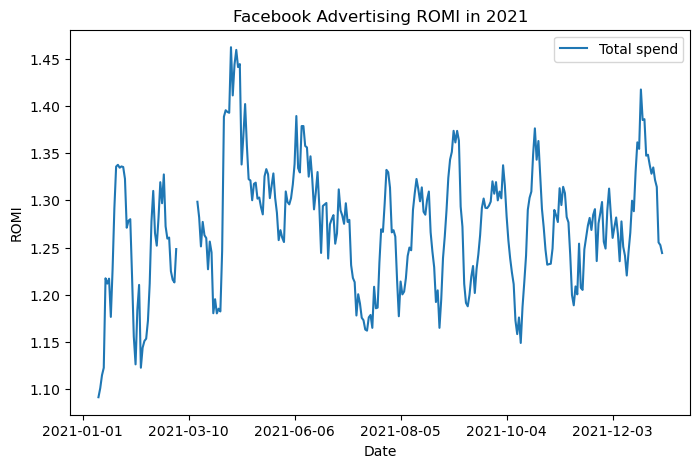

In [6]:
plt.figure(figsize=(8,5), dpi=100)

plt.plot(daily_stats_2021['ad_date'], daily_stats_2021['romi'].rolling(10).mean(), label='Total spend')

plt.legend()

plt.title('Facebook Advertising ROMI in 2021')

plt.xlabel('Date')
plt.ylabel('ROMI')

plt.xticks(list(daily_stats_2021['ad_date'])[::60])

plt.show()

In [7]:
campaign_stats = df.groupby('campaign_name')[['total_spend', 'total_value']].sum()
campaign_stats

,total_spend,total_value
campaign_name,,
Brand,539.92,670.15
Crazy discounts,2175.29,2583.59
Discounts,2856.39,3516.27
Electronics,23920.42,29169.38
Expansion,67212.82,83288.66
Hobbies,11326.97,13974.63
Lookalike,63631.09,80234.70
New items,2936.97,3742.05
Promos,4993.84,8793.77


In [8]:
campaign_stats['romi'] = campaign_stats['total_value'] / campaign_stats['total_spend']
campaign_stats = campaign_stats.reset_index()
campaign_stats

,campaign_name,total_spend,total_value,romi
0,Brand,539.92,670.15,1.241202
1,Crazy discounts,2175.29,2583.59,1.187699
2,Discounts,2856.39,3516.27,1.231019
3,Electronics,23920.42,29169.38,1.219434
4,Expansion,67212.82,83288.66,1.239178
5,Hobbies,11326.97,13974.63,1.233748
6,Lookalike,63631.09,80234.70,1.260935
7,New items,2936.97,3742.05,1.274119
8,Promos,4993.84,8793.77,1.760923
9,Trendy,1992.31,3798.90,1.906782


<Axes: xlabel='total_spend', ylabel='campaign_name'>

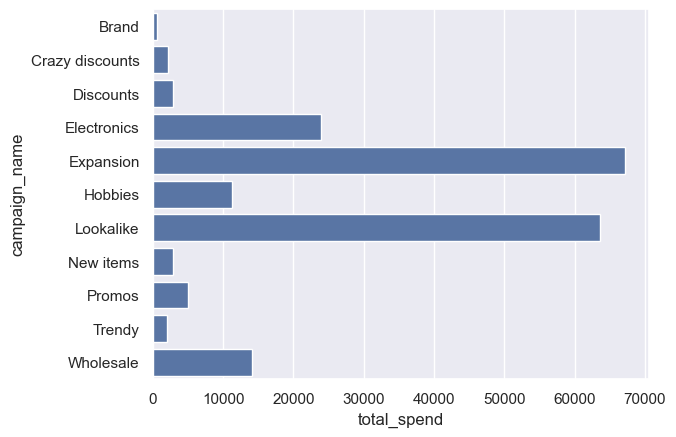

In [9]:
import seaborn as sns

sns.set_theme()

sns.barplot(x='total_spend', y='campaign_name', data=campaign_stats, color="b")

<Axes: xlabel='romi', ylabel='campaign_name'>

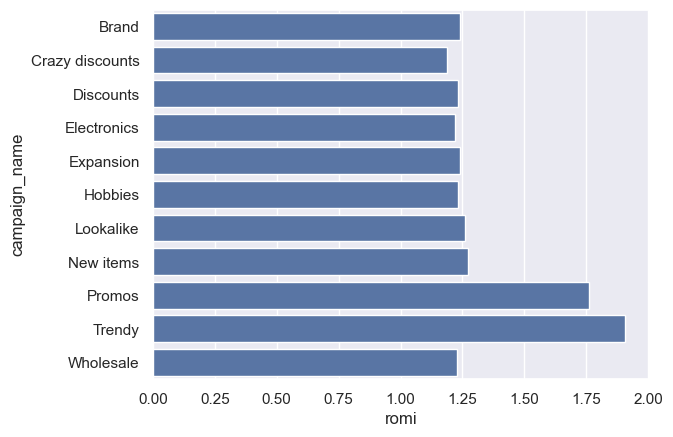

In [10]:
sns.barplot(x='romi', y='campaign_name', data=campaign_stats, color="b")

<Axes: xlabel='campaign_name', ylabel='romi'>

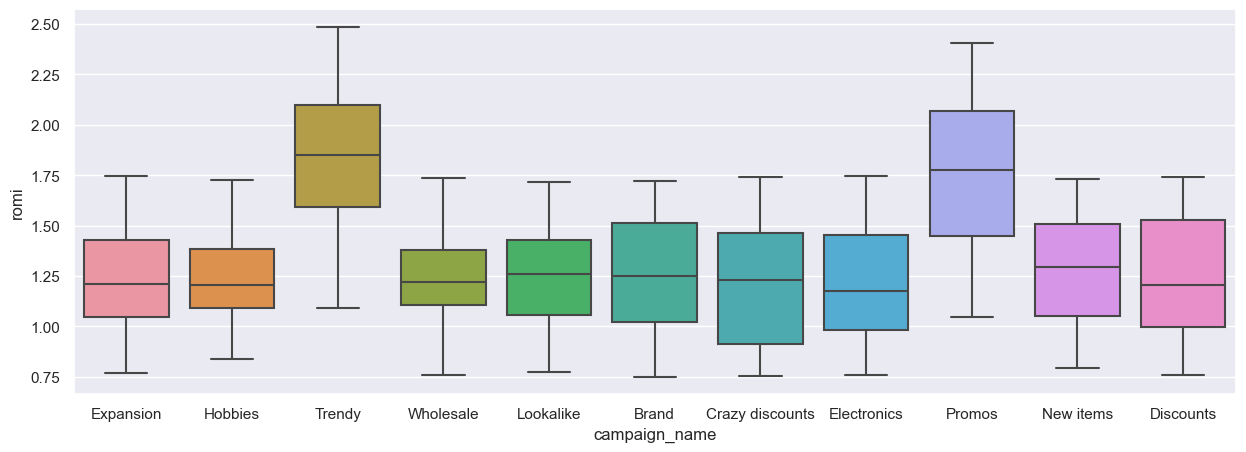

In [11]:
plt.figure(figsize=(15,5), dpi=100)

sns.boxplot(x="campaign_name", y="romi", data=df)

C:\Users\Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


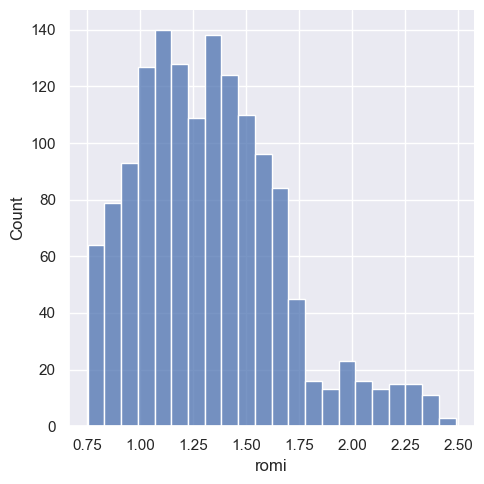

In [12]:
sns.displot(data=df, x="romi")

<Axes: >

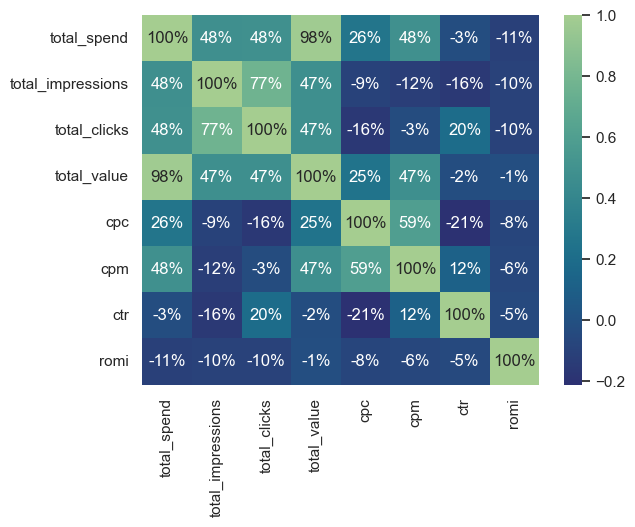

In [13]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.0%', cmap= 'crest_r')

C:\Users\Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


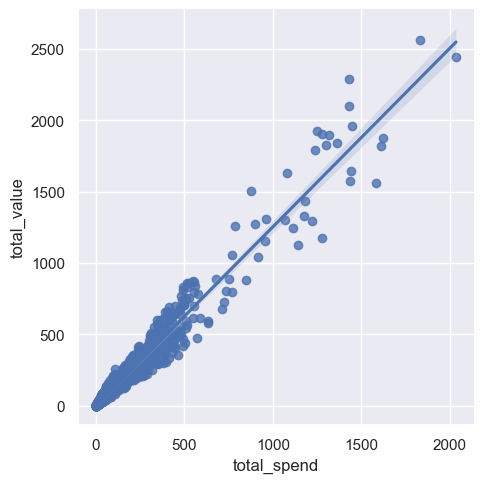

In [14]:
sns.lmplot(data=df, x="total_spend", y="total_value")